In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Introduction to ConvNets: Classifying handwritten numbers


Let's take a look at a simple example of a convnet. We will use it to classify the MNIST dataset, which is an open dataset containing handwritten numbers.

![Handwritten numbers from the MNIST dataset] (https://pedrofrodenas.github.io/assets/images/mnist.jpg)

Let's create a first basic convnet. It's a stack of 'Conv2D' and 'MaxPooling2D' layers.
The important thing to note is that a convnet takes as input tensors of size `(image_height, image_width, image_channels)`.
To do this we must first find out the size of the images in our dataset.

The network must have the following layers:

- A convolutional layer (Conv2D) with 32 3x3 filters and relu activation. In this first layer you must indicate the size of the input (input_shape).
- A second layer of Max Pooling (MaxPooling2D) of 2x2
- A third convolutional layer with 64 3x3 filters and relu activation
- A fourth layer of 2x2 Max Pooling (MaxPooling2D)
- A fifth convolutional layer of 64 3x3 filters and relu activation

You'll know you've done it right when the model.summary() output is:

![imagen_output.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output.png?raw=true)


In [4]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape images to add the channel dimension and normalize pixel values to [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

# Define the convolutional neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # First convolutional layer
model.add(layers.MaxPooling2D((2, 2)))                                            # First max pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                           # Second convolutional layer
model.add(layers.MaxPooling2D((2, 2)))                                            # Second max pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))                           # Third convolutional layer

# Print the model architecture
model.summary()

/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

You can see above that the output of each Conv2D and MaxPooling2D layer is a 3D tensor of dimensions (height, width, channels). The width and height tend to decrease as we go deeper into the network. The number of channels is controlled by the first argument passed to the Conv2D layers (e.g. 32 or 64).

The next step would be to give our last tensor (of dimensions (3, 3, 64)) as input to a densely connected network. These classifiers process vectors, which are 1D, while our output is a 3D tensor. So first we will have to flatten our 3D output and convert it to 1D and then add a few dense layers:

- Add a first layer of 64 neurons
- Add a last layer of 10 neurons (as many as you can sort) and softmax activation
- You'll know you've done well when the summary looks like this:

![imagen_output_flat.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output_flat.png?raw=true)

In [5]:
# Flatten the 3D output to 1D
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 neurons (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Print the complete model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

As you can see, our dimensional output `(3, 3, 64)` has been flattened into a vector of dimension `(576,)`, before entering the two dense layers.

We are now going to train our network with the images from the MNIST dataset.

We then load the dataset and put it into vectors: train_images, train_labels, test_images, test_labels

Before you continue, print:

- What is the size of the training dataset?
- What does the training dataset look like?
- What do the training labels look like?
- Print the fourth image of the training dataset


Training dataset size: (60000, 28, 28)
Shape of one training image: (28, 28)
Training labels (first 10): [5 0 4 1 9 2 1 3 1 4]


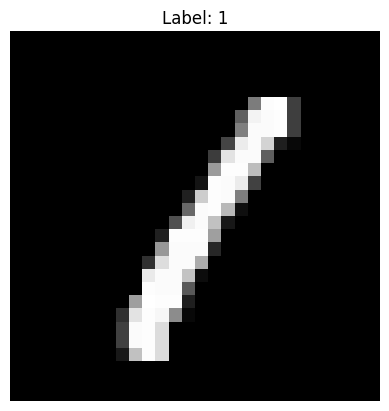

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the size of the training dataset
print("Training dataset size:", train_images.shape)

# Print the shape of a single training image
print("Shape of one training image:", train_images[0].shape)

# Print the training labels (first 10 for clarity)
print("Training labels (first 10):", train_labels[:10])

# Display the fourth image in the training dataset
plt.imshow(train_images[3], cmap='gray')
plt.title(f"Label: {train_labels[3]}")
plt.axis('off')
plt.show()

Next you will give the appropriate shape to the training and test datasets in order to put them into the neural network. Convert the labels, which right now are numbers, into their categorical form. Check the keras utils manual.

In [7]:
# Reshape the images to have shape (28, 28, 1) and normalize pixel values
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Check the shape of the labels after encoding
print("Shape of one-hot encoded training labels:", train_labels[0])

Shape of one-hot encoded training labels: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Compile the model indicating what the training data and its labels are. Using the optimizer "rmsprop" and as a loss function use the categorical cross entropy.
Then train the model for 5 epochs and a batch size of 64.

In [8]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, 
          epochs=5, 
          batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8752 - loss: 0.3908
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9837 - loss: 0.0534
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0346
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9917 - loss: 0.0251
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9937 - loss: 0.0200


Let's evaluate the model with the test images:

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0406
Test accuracy: 0.9899
Test loss: 0.0345


Create an image with a handwritting number and check the prediction.

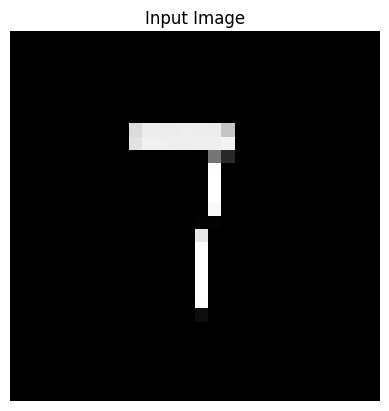

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted digit: 3


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_width = 28
img_height = 28

# Load the image in grayscale and resize to 28x28
img = tf.keras.preprocessing.image.load_img('siete.jpg', target_size=(img_width, img_height), color_mode="grayscale")

# Convert the image to a numpy array
x = tf.keras.preprocessing.image.img_to_array(img)

# Normalize the pixel values to [0, 1]
x = x.astype("float32") / 255.0

# Expand dimensions to match the input shape of the model (1, 28, 28, 1)
x = np.expand_dims(x, axis=0)

# Display the image
plt.imshow(x[0, :, :, 0], cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

# Make prediction
predictions = model.predict(x)
predicted_digit = np.argmax(predictions)

# Show the predicted class
print(f"Predicted digit: {predicted_digit}")


In [11]:
model.save("net_numbers.keras")

Load the model that you just saved and make a prediction with the number you just generated. Try with several numbers ...does it work properly? Explain why do you think this happens.

In [12]:
from tensorflow.keras.models import load_model

# Load the previously saved model
loaded_model = load_model("net_numbers.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


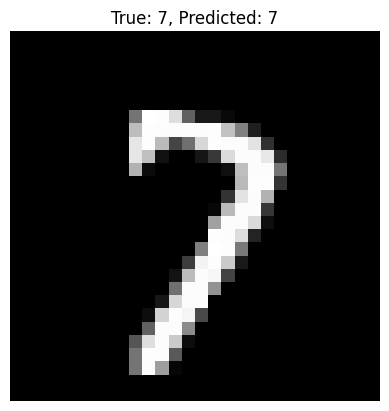

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


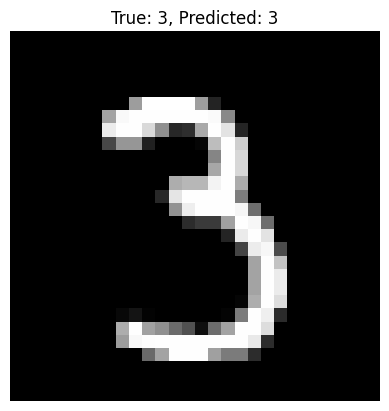

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


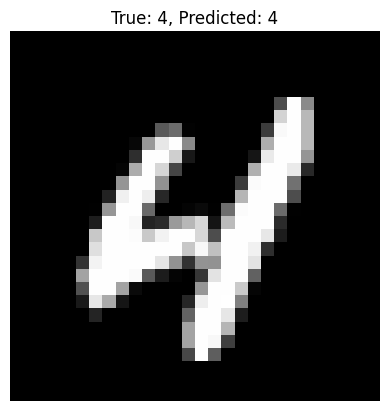

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


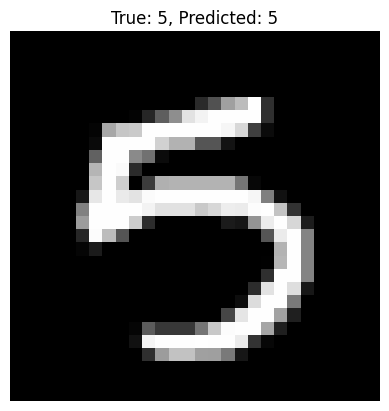

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


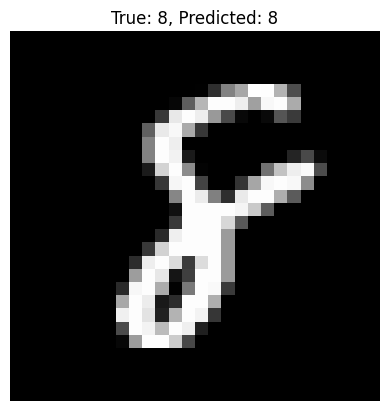

In [13]:
# Choose 5 random test images
random_indices = np.random.choice(test_images.shape[0], size=5, replace=False)

for idx in random_indices:
    img = test_images[idx]
    true_label = np.argmax(test_labels[idx])
    
    # Prepare the image for prediction
    x = np.expand_dims(img, axis=0)
    
    # Predict with the loaded model
    prediction = loaded_model.predict(x)
    predicted_label = np.argmax(prediction)

    # Display the image and the prediction
    plt.imshow(img[:, :, 0], cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Preprocess the input image: grayscale, resize to 28x28, normalize
def preprocess_image(filename):
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


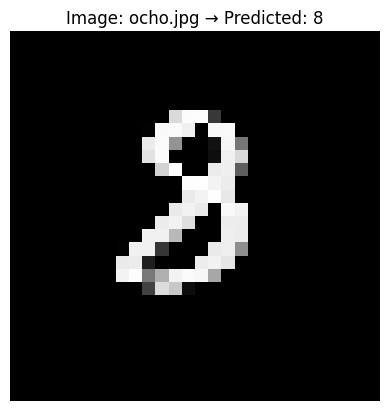

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


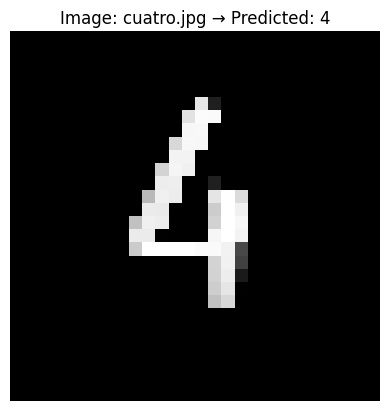

In [15]:
# Load and preprocess the test images
images = {
    "ocho.jpg": preprocess_image("ocho.jpg"),
    "cuatro.jpg": preprocess_image("cuatro.jpg")
}

# Predict and display each image
for filename, img in images.items():
    x = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = loaded_model.predict(x)
    predicted_label = np.argmax(prediction)

    # Display the image and the predicted label
    plt.imshow(img[:, :, 0], cmap='gray')
    plt.title(f"Image: {filename} → Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()